In [120]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

The point of this notebook is to show that the linearization of the conic at the Z projection point is correct to linear order in a displacement

In [121]:
z,rho,z0,rho0,d, k = sp.symbols('z \\rho z_0 \\rho_0 \delta k', real=True)
R = sp.symbols('R', real=True)

In [122]:
c=1/R


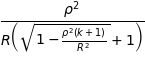

In [123]:
conz =(c*(rho**2)) / (1 + sp.sqrt(1-(1+k)*c**2*(rho**2)))
conconst = conz-z
conz

In [124]:
norm = sp.Matrix([sp.diff(conconst,rho), sp.diff(conconst,z)])
norm = sp.simplify(norm/norm.norm())
norm

⎡                                                                    ⎛        
⎢                                                                    ⎜     2  
⎢                                                               \rho⋅⎝- 2⋅R ⋅╲
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                      _______
⎢  ⎛                                ______________________    ⎞       ╱       
⎢  ⎜     2       2         2       ╱  2       2         2     ⎟      ╱   2 │  
⎢R⋅⎝- 2⋅R  + \rho ⋅k + \rho  - 2⋅╲╱  R  - \rho ⋅k - \rho  ⋅│R│⎠⋅    ╱   R ⋅│──
⎢                                                                  ╱       │  
⎢                                                                 ╱        │  
⎢                                                               ╲╱         │╲╱
⎢                                                                             
⎢                                                   

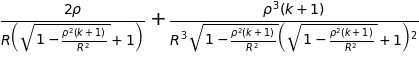

In [125]:
slope = sp.diff(conz, rho)
slope

In [126]:
p=sp.Matrix([rho,conz])
p

⎡              \rho               ⎤
⎢                                 ⎥
⎢                  2              ⎥
⎢              \rho               ⎥
⎢─────────────────────────────────⎥
⎢  ⎛      ___________________    ⎞⎥
⎢  ⎜     ╱         2             ⎟⎥
⎢  ⎜    ╱      \rho ⋅(k + 1)     ⎟⎥
⎢R⋅⎜   ╱   1 - ─────────────  + 1⎟⎥
⎢  ⎜  ╱               2          ⎟⎥
⎣  ⎝╲╱               R           ⎠⎦

In [127]:
p1 = p + norm*d
p1

⎡                                                                             
⎢                                                                             
⎢                                                                  \delta⋅\rho
⎢\rho + ──────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢         ⎛                                ______________________    ⎞       ╱
⎢         ⎜     2       2         2       ╱  2       2         2     ⎟      ╱ 
⎢       R⋅⎝- 2⋅R  + \rho ⋅k + \rho  - 2⋅╲╱  R  - \rho ⋅k - \rho  ⋅│R│⎠⋅    ╱  
⎢                                                                         ╱   
⎢                                                                        ╱    
⎢                                                                      ╲╱     
⎢                                                                             
⎢                                                   

In [128]:
projectionpoint = ((sp.Matrix([p1[0], conz.subs(rho,p1[0])])))
projectionpoint

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                    \rho + ──────────────────────────────────────────────────
⎢                                                                             
⎢                             ⎛                                _______________
⎢                             ⎜     2       2         2       ╱  2       2    
⎢                           R⋅⎝- 2⋅R  + \rho ⋅k + \rho  - 2⋅╲╱  R  - \rho ⋅k -
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

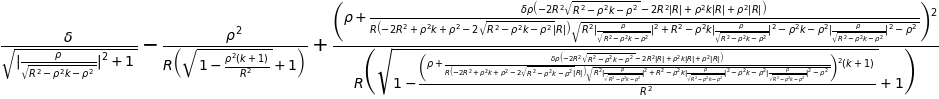

In [129]:
dz = (projectionpoint[1] - p1[1])
(dz)

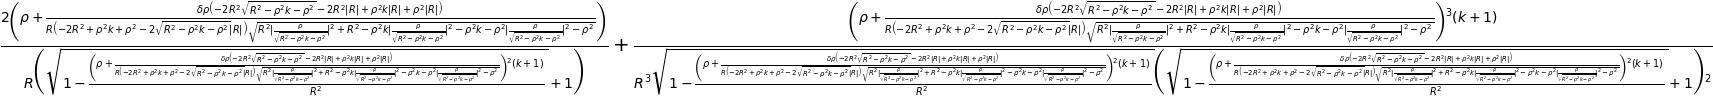

In [130]:
projslope = (slope.subs(rho, projectionpoint[0]))
projslope

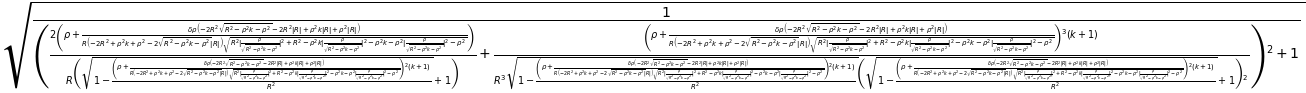

In [131]:
S=(sp.sqrt((1 / (projslope**2+1))))
S

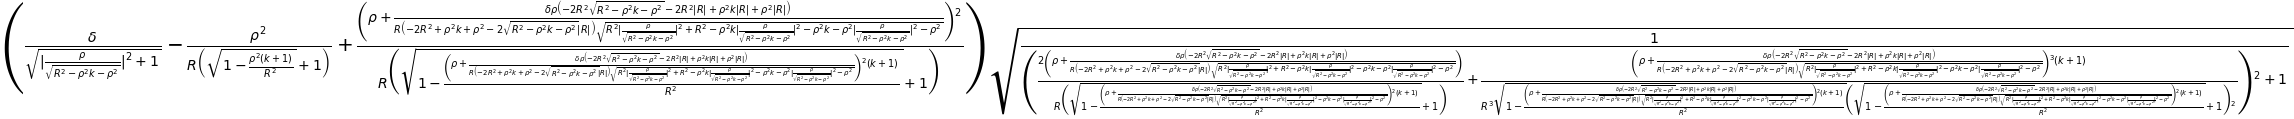

In [132]:
dmin = (S*dz)
dmin

In [133]:
dd=(sp.diff(dmin,d,1).subs(d,0))

In [134]:
sp.simplify(dd.subs(k,.1).subs(R,4400).subs(rho, 4100))

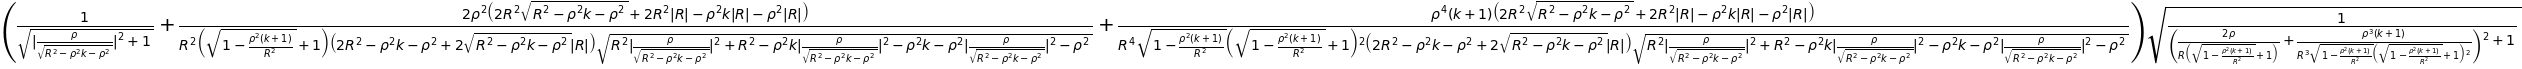

In [135]:
sp.simplify(dd)

This is not a proof but we can evaluate this derivative at lots of points numerically and see that it is always one when conz is real:

In [220]:
def numeric(val, Rval=4500,kval=0, rval=4499):
    return sp.N(val.subs(R, Rval).subs(rho,rval).subs(k,kval))

In [214]:
print(numeric(conz))
sp.simplify(numeric(dd))

1.11124831920299


In the case of the parabola, the derivative symbolically evaluates to 1:

In [205]:
dd_parab=sp.simplify(((dd.subs(k,-1))))
dd_parab

In [206]:
dd2=(sp.diff(dmin,d,2).subs(d,0))

In [221]:
print(numeric(dd))
print(numeric(dd2))

1.00000000000000
-0.499833339506859


In [223]:
print(dd2)

\rho**2*(-(2 + 5*\rho**2*(k + 1)/(R**2*sqrt(1 - \rho**2*(k + 1)/R**2)*(sqrt(1 - \rho**2*(k + 1)/R**2) + 1)) + 2*\rho**4*(k + 1)**2/(R**4*(1 - \rho**2*(k + 1)/R**2)*(sqrt(1 - \rho**2*(k + 1)/R**2) + 1)**2) + \rho**4*(k + 1)**2/(R**4*(1 - \rho**2*(k + 1)/R**2)**(3/2)*(sqrt(1 - \rho**2*(k + 1)/R**2) + 1)))*(2*R**2*sqrt(R**2 - \rho**2*k - \rho**2) + 2*R**2*Abs(R) - \rho**2*k*Abs(R) - \rho**2*Abs(R))/((2*R**2 - \rho**2*k - \rho**2 + 2*sqrt(R**2 - \rho**2*k - \rho**2)*Abs(R))*(-R**2*Abs(\rho/sqrt(R**2 - \rho**2*k - \rho**2))**2 - R**2 + \rho**2*k*Abs(\rho/sqrt(R**2 - \rho**2*k - \rho**2))**2 + \rho**2*k + \rho**2*Abs(\rho/sqrt(R**2 - \rho**2*k - \rho**2))**2 + \rho**2)) - 2*(2 + \rho**2*(k + 1)/(R**2*sqrt(1 - \rho**2*(k + 1)/R**2)*(sqrt(1 - \rho**2*(k + 1)/R**2) + 1)))*(1/sqrt(Abs(\rho/sqrt(R**2 - \rho**2*k - \rho**2))**2 + 1) + 2*\rho**2*(2*R**2*sqrt(R**2 - \rho**2*k - \rho**2) + 2*R**2*Abs(R) - \rho**2*k*Abs(R) - \rho**2*Abs(R))/(R**2*(sqrt(1 - \rho**2*(k + 1)/R**2) + 1)*(2*R**2 - \rho**2*